# Análisis de Datos

In [125]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [126]:
# Cargar el conjunto de datos Titanic
df = sns.load_dataset('titanic')

In [127]:
# Columna objetivo
target_column = 'survived'

In [128]:
# Columnas a eliminar
cols_to_drop = ['class', 'embark_town', 'alive']

## EDA

### 1-. EDA (textual)

In [129]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('EXPLORACIÓN TEXTUAL')
print(f'{'~'*50}\n')

# --- Primeros y últimos registros ---
print(f'{'-'*30}\nPrimeros registros:\n{'-'*30}')
display(df.head(5))

print(f'{'-'*30}\nÚltimos registros:\n{'-'*30}')
display(df.tail(5))

print(f'\n{'='*50}\n')

# --- Información, dimensión, columna y tipo de dato ---
print(f'{'-'*30}\nInformación:\n{'-'*30}')
display(df.info())

print(f'{'-'*30}\nDimensión:\n{'-'*30}')
display(df.shape)

print(f'{'-'*30}\nColumna y tipo de dato:\n{'-'*30}')
display(pd.DataFrame(df.dtypes, columns=['Tipo de dato']))

print(f'\n{'='*50}\n')

# --- Descripción estadística, moda, varianza, rango y cardinalidad ---
print(f'{'-'*30}\nDescripción estadística:\n{'-'*30}')
summary = df.describe(include='all').T
summary.insert(2, 'mode', df.mode().iloc[0])
summary.insert(5, 'var', df.select_dtypes(include=[np.number]).var())
summary['range'] = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()
summary['unique'] = df.nunique()
display(summary.drop(columns=['top', 'freq']))

print(f'\n{'='*50}\n')

# --- Distribución ---
print(f'{'-'*30}\nDistribución:\n{'-'*30}')
for col in df.columns:
    print(f'\n ° {col}:')
    display(pd.DataFrame({
        'Conteo': df[col].value_counts(), 
        'Porcentaje': (df[col].value_counts(normalize=True) * 100).round(2)
    }))

print(f'\n{'='*50}\n')

# --- Nulos, duplicados y valores atípicos ---
print(f'{'-'*30}\nNulos:\n{'-'*30}')
display(pd.DataFrame({
    'Conteo': df.isnull().sum(), 
    'Porcentaje': (df.isnull().mean() * 100).round(2)
}))

print(f'{'-'*30}\nDuplicados:\n{'-'*30}')
display(pd.DataFrame({
    'Conteo': [df.duplicated().sum()], 
    'Porcentaje': [(df.duplicated().mean() * 100).round(2)]
}))

print(f'{'-'*30}\nValores atípicos:\n{'-'*30}')
outliers = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lwr_bnd = Q1 - 1.5 * IQR
    upr_bnd = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lwr_bnd) | (df[col] > upr_bnd)].shape[0]
    outliers[col] = {
        'Conteo': outliers_count,
        'Porcentaje': round(outliers_count / df.shape[0] * 100, 2)
    }
display(pd.DataFrame(outliers).T)

print(f'\n{'='*50}\n')

# --- Uso de memoria ---
print(f'{'-'*30}\nUso de memoria:\n{'-'*30}')
display(df.memory_usage(deep=True).to_frame('Bytes'))

print(f'\n{'~'*50}')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EXPLORACIÓN TEXTUAL
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
Primeros registros:
------------------------------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


------------------------------
Últimos registros:
------------------------------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True




------------------------------
Información:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

------------------------------
Dimensión:
------------------------------


(891, 15)

------------------------------
Columna y tipo de dato:
------------------------------


,Tipo de dato
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object




------------------------------
Descripción estadística:
------------------------------


,count,unique,mode,var,mean,std,min,25%,50%,75%,max,range
survived,891.0,2,0,0.236772,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0,1.0000
pclass,891.0,3,3,0.699015,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0,2.0000
sex,891,2,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,88,24.0,211.019125,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0,79.5800
sibsp,891.0,7,0,1.216043,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0,8.0000
parch,891.0,7,0,0.649728,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0,6.0000
fare,891.0,248,8.05,2469.436846,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,512.3292
embarked,889,3,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




------------------------------
Distribución:
------------------------------

 ° survived:


,Conteo,Porcentaje
survived,,
0,549,61.62
1,342,38.38



 ° pclass:


,Conteo,Porcentaje
pclass,,
3,491,55.11
1,216,24.24
2,184,20.65



 ° sex:


,Conteo,Porcentaje
sex,,
male,577,64.76
female,314,35.24



 ° age:


,Conteo,Porcentaje
age,,
24.00,30,4.20
22.00,27,3.78
18.00,26,3.64
19.00,25,3.50
28.00,25,3.50
...,...,...
36.50,1,0.14
55.50,1,0.14
0.92,1,0.14



 ° sibsp:


,Conteo,Porcentaje
sibsp,,
0,608,68.24
1,209,23.46
2,28,3.14
4,18,2.02
3,16,1.80
8,7,0.79
5,5,0.56



 ° parch:


,Conteo,Porcentaje
parch,,
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11



 ° fare:


,Conteo,Porcentaje
fare,,
8.0500,43,4.83
13.0000,42,4.71
7.8958,38,4.26
7.7500,34,3.82
26.0000,31,3.48
...,...,...
35.0000,1,0.11
28.5000,1,0.11
6.2375,1,0.11



 ° embarked:


,Conteo,Porcentaje
embarked,,
S,644,72.44
C,168,18.90
Q,77,8.66



 ° class:


,Conteo,Porcentaje
class,,
Third,491,55.11
First,216,24.24
Second,184,20.65



 ° who:


,Conteo,Porcentaje
who,,
man,537,60.27
woman,271,30.42
child,83,9.32



 ° adult_male:


,Conteo,Porcentaje
adult_male,,
True,537,60.27
False,354,39.73



 ° deck:


,Conteo,Porcentaje
deck,,
C,59,29.06
B,47,23.15
D,33,16.26
E,32,15.76
A,15,7.39
F,13,6.40
G,4,1.97



 ° embark_town:


,Conteo,Porcentaje
embark_town,,
Southampton,644,72.44
Cherbourg,168,18.90
Queenstown,77,8.66



 ° alive:


,Conteo,Porcentaje
alive,,
no,549,61.62
yes,342,38.38



 ° alone:


,Conteo,Porcentaje
alone,,
True,537,60.27
False,354,39.73




------------------------------
Nulos:
------------------------------


,Conteo,Porcentaje
survived,0,0.00
pclass,0,0.00
sex,0,0.00
age,177,19.87
sibsp,0,0.00
parch,0,0.00
fare,0,0.00
embarked,2,0.22
class,0,0.00
who,0,0.00


------------------------------
Duplicados:
------------------------------


,Conteo,Porcentaje
0,107,12.01


------------------------------
Valores atípicos:
------------------------------


,Conteo,Porcentaje
survived,0.0,0.00
pclass,0.0,0.00
age,11.0,1.23
sibsp,46.0,5.16
parch,213.0,23.91
fare,116.0,13.02




------------------------------
Uso de memoria:
------------------------------


,Bytes
Index,132
survived,7128
pclass,7128
sex,47851
age,7128
sibsp,7128
parch,7128
fare,7128
embarked,44514
class,1162



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 2-. EDA (visual)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EXPLORACIÓN VISUAL
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
Histogramas:
------------------------------


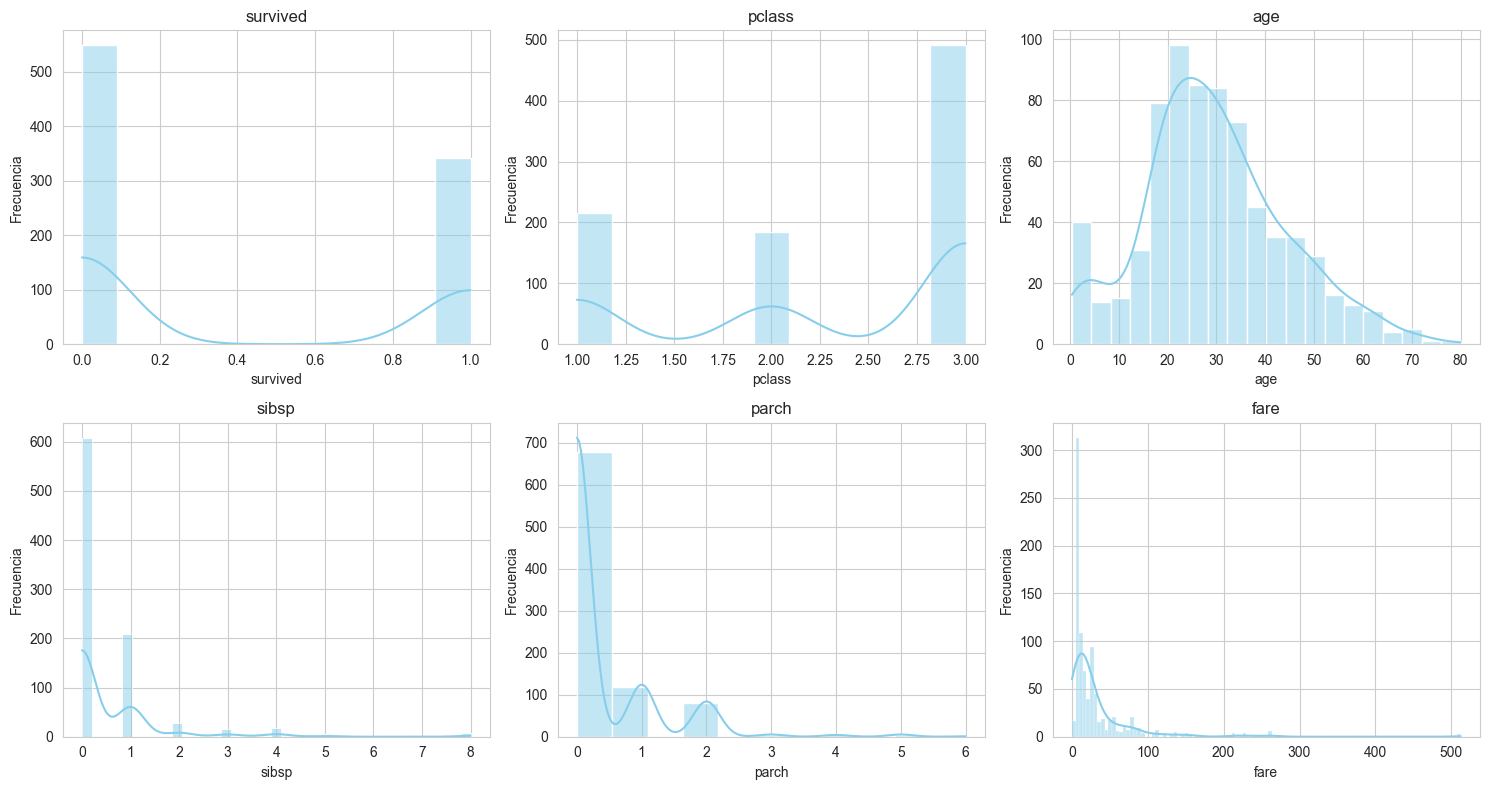



------------------------------
Diagramas de caja:
------------------------------


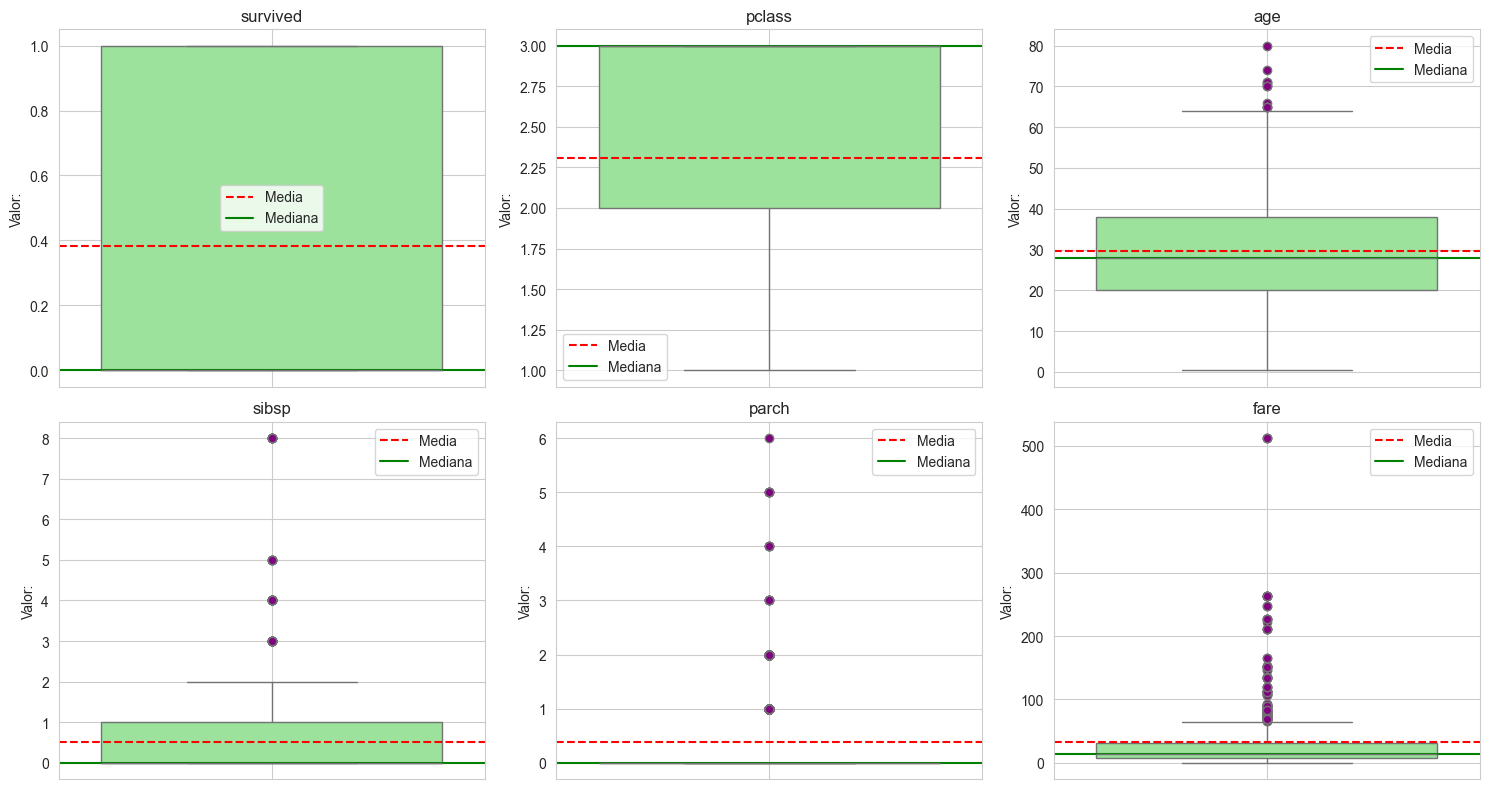



------------------------------
Gráficas de barras:
------------------------------


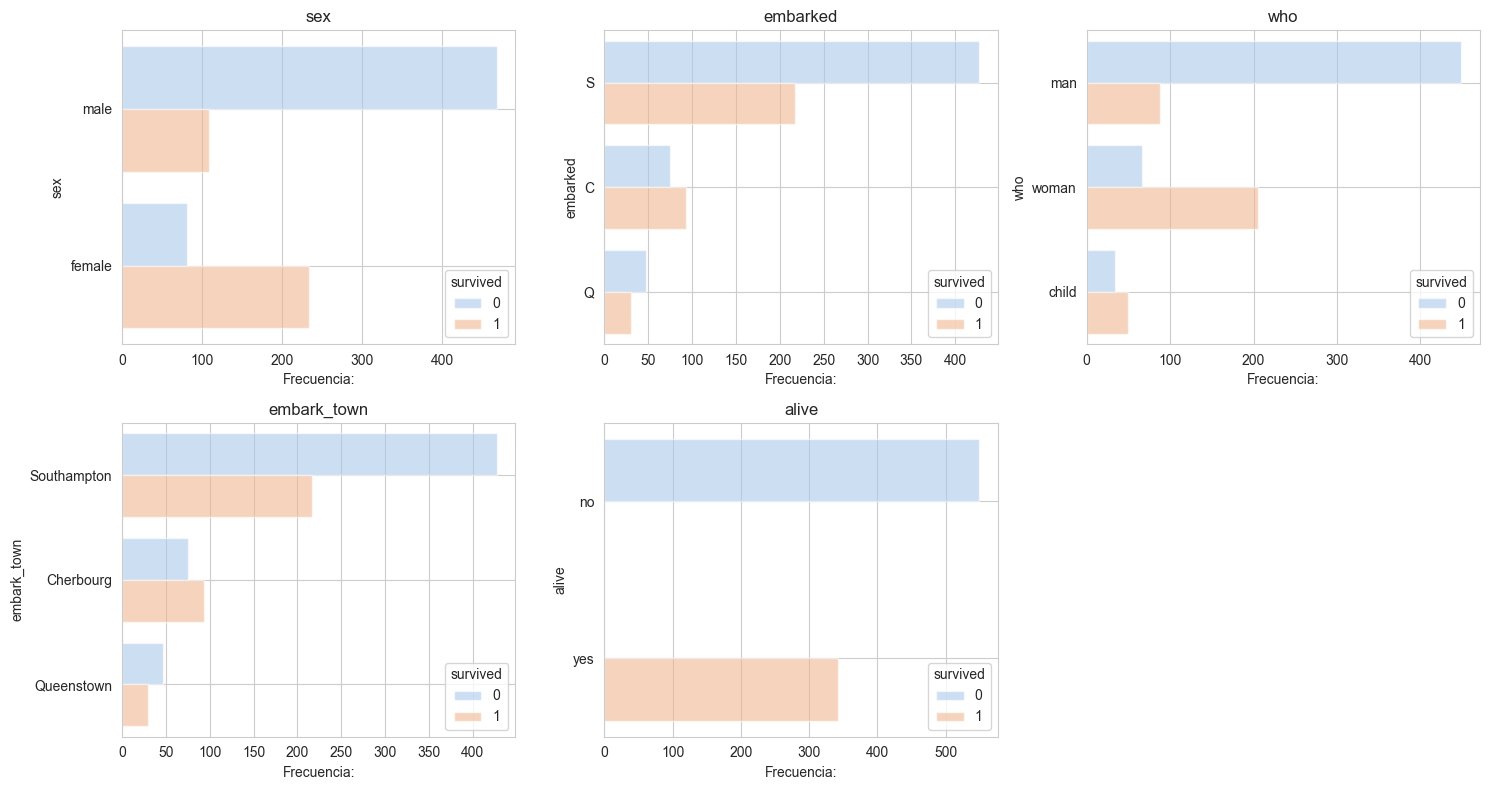



------------------------------
Matriz de correlación:
------------------------------


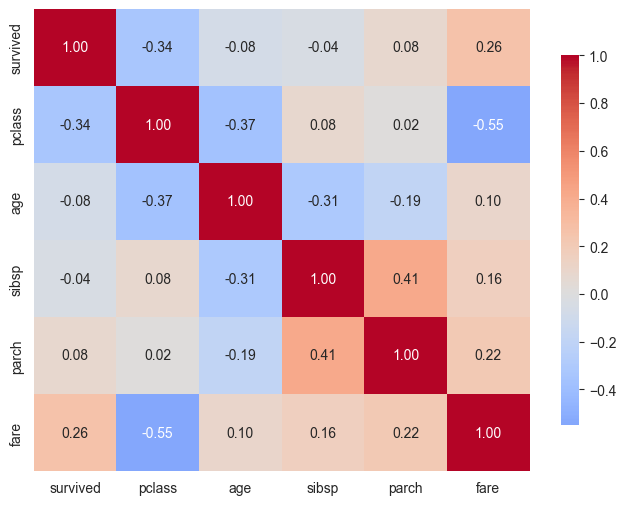



------------------------------
Gráficas bivariadas:
------------------------------


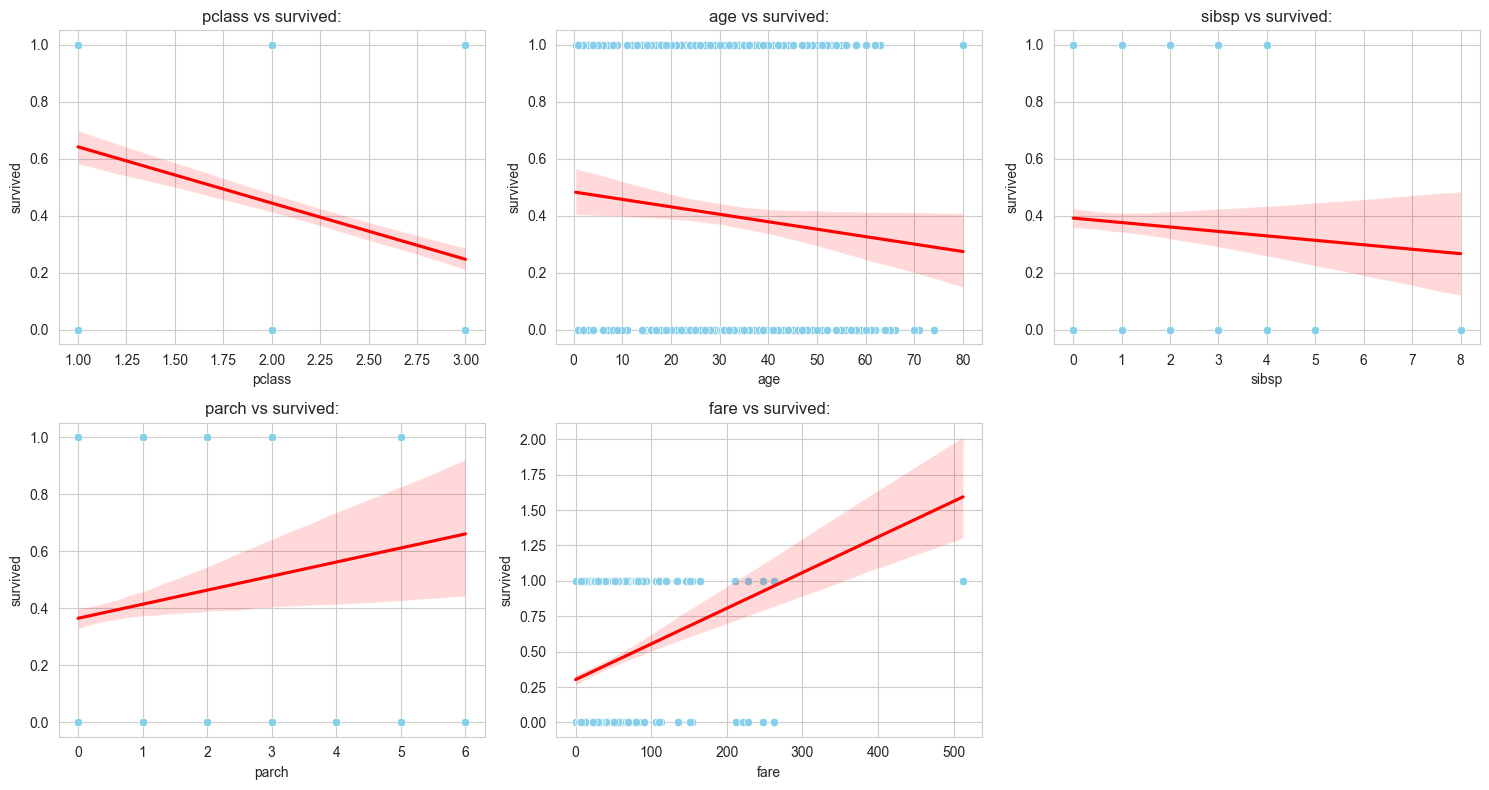



------------------------------
Gráficas de violín:
------------------------------


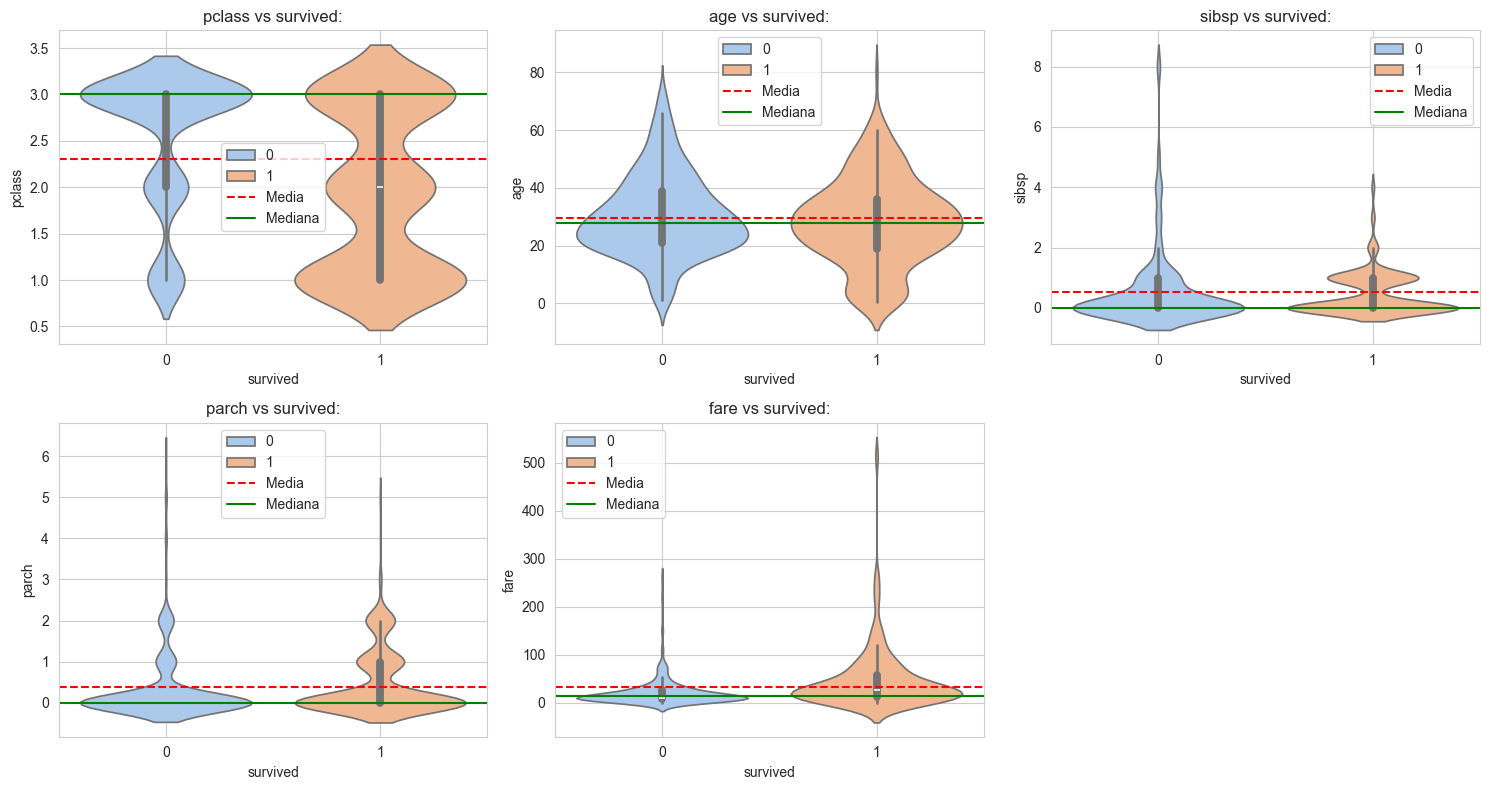


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [130]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('EXPLORACIÓN VISUAL')
print(f'{'~'*50}\n')

# --- Configuración de despliegue ---
num_cols = df.select_dtypes(include=[np.number]).columns
obj_cols = df.select_dtypes(include=['object']).columns
n_num_cols = len(num_cols)
n_obj_cols = len(obj_cols)
cols_per_row = 3
num_rows = (n_num_cols // cols_per_row) + int(n_num_cols % cols_per_row != 0)
obj_rows = (n_obj_cols // cols_per_row) + int(n_obj_cols % cols_per_row != 0)

# --- Configuración de estilo ---
sns.set_palette('pastel')
sns.set_style('whitegrid')
tight_layout = True

# --- Histogramas ---
print(f'{'-'*30}\nHistogramas:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Diagramas de caja ---
print(f'{'-'*30}\nDiagramas de caja:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axes[i], color='lightgreen', flierprops=dict(markerfacecolor='purple', marker='o'))
    axes[i].axhline(df[col].mean(), color='red', linestyle='--', label='Media')
    axes[i].axhline(df[col].median(), color='green', linestyle='-', label='Mediana')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Valor:')
    axes[i].grid(True)
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Gráficos de barras ---
print(f'{'-'*30}\nGráficas de barras:\n{'-'*30}')
fig, axes = plt.subplots(obj_rows, cols_per_row, figsize=(cols_per_row*5, obj_rows*4))
axes = axes.flatten()

for i, col in enumerate(obj_cols):
    sns.countplot(y=df[col], ax=axes[i], alpha=0.6, palette='pastel', order=df[col].value_counts().index, dodge=True, hue=df[target_column] if col != target_column else None)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Frecuencia:')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Matriz de correlación ---
print(f'{'-'*30}\nMatriz de correlación:\n{'-'*30}')
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": .8}, center=0)
plt.show()

print(f'\n{'='*50}\n')

# --- Gráficas bivariadas ---
print(f'{'-'*30}\nGráficas bivariadas:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

num_cols_no_target_column = [col for col in num_cols if col != target_column]

for i, col in enumerate(num_cols_no_target_column):
    if col != target_column:
        sns.scatterplot(x=df[col], y=df[target_column], ax=axes[i], color='skyblue')
        sns.regplot(x=df[col], y=df[target_column], scatter=False, ax=axes[i], color='red', label='Línea de tendencia')
        axes[i].set_title(f'{col} vs {target_column}:')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_column)
        axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Gráficas de violín ---
print(f'{'-'*30}\nGráficas de violín:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

num_cols_no_target_column = [col for col in num_cols if col != target_column]

for i, col in enumerate(num_cols_no_target_column):
    if col != target_column:
        sns.violinplot(x=df[target_column], y=df[col], ax=axes[i], palette='pastel', hue=df[target_column] if col != target_column else None)
        axes[i].axhline(df[col].mean(), color='red', linestyle='--', label='Media')
        axes[i].axhline(df[col].median(), color='green', linestyle='-', label='Mediana')
        axes[i].set_title(f'{col} vs {target_column}:')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(col)
        axes[i].grid(True)
        axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'~'*50}')

### 3-. Limpieza

In [ ]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('LIMPIEZA Y PREPARACIÓN DE DATOS')
print(f'{'~'*50}\n')

# --- Eliminación de columnas irrelevantes ---
print(f'{'-'*30}\nEliminación de columnas irrelevantes:\n{'-'*30}')
df_no_cols = df.drop(columns=cols_to_drop).reset_index(drop=True)
print(f'\nColumnas eliminadas: {cols_to_drop}')

print(f'\n{'='*50}\n')

# --- Eliminación de duplicados ---
print(f'{'-'*30}\nEliminación de duplicados:\n{'-'*30}')
df_no_dups = df.drop_duplicates().reset_index(drop=True)
display(df[df.duplicated()])
print(f'\nDuplicados eliminados: {len(df[df.duplicated()])}')

print(f'\n{'='*50}\n')

# --- Información y manejo de datos atípicos ---
print(f'{'-'*30}\nInformación de datos atipicos:\n{'-'*30}')
display(pd.DataFrame(outliers).T)

print(f'{'-'*30}\nManejo de datos atipicos:\n{'-'*30}')
df_no_outliers = df.copy()
outliers_df_no_outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lwr_bnd = Q1 - 1.5 * IQR
    upr_bnd = Q3 + 1.5 * IQR

    df_no_outliers[col] = df_no_outliers[col].clip(lwr_bnd, upr_bnd)
    outliers_count_df_no_outliers = df_no_outliers[(df_no_outliers[col] < lwr_bnd) | (df_no_outliers[col] > upr_bnd)].shape[0]
    outliers_df_no_outliers[col] = {
        'Conteo': outliers_count_df_no_outliers,
        'Porcentaje': round(outliers_count_df_no_outliers / df.shape[0] * 100, 2)
    }
display(pd.DataFrame(outliers_df_no_outliers).T)

print(f'\n{'='*50}\n')

# --- Información y manejo de valores nulos ---
print(f'{'-'*30}\nInformación de valores nulos:\n{'-'*30}')
null_cols = df.columns[df.isnull().any()]
nulls_corr = df[null_cols].isnull().corr()
mask = np.triu(np.ones(nulls_corr.shape), k=1).astype(bool)
corr_vals = nulls_corr.where(mask).stack()
df_nulls_corr = corr_vals[abs(corr_vals) >= 0.3].reset_index()
df_nulls_corr.columns = ['Columna 1', 'Columna 2', 'Correlación']
display(df_nulls_corr)

print(f'{'-'*30}\nManejo de valores nulos:\n{'-'*30}')
df_no_nulls = df.copy()
display(df_no_nulls.dropna(how='all', inplace=True))
df_no_nulls.dropna(how='all', inplace=True)
print(f'\nRegistros nulos eliminados: {len(df) - len(df_no_nulls)}')
for column in df_no_nulls.columns:   
    if column != target_column and df_no_nulls[column].isnull().sum() > 0:
        if df_no_nulls[column].dtype in [np.float64, np.int64] and abs(df_no_nulls[column].skew()) > 0.5:
            df_no_nulls[column].fillna(df_no_nulls[column].median(), inplace=True)
        elif df_no_nulls[column].dtype in [np.float64, np.int64] and abs(df_no_nulls[column].skew()) <= 0.5:
            df_no_nulls[column].fillna(df_no_nulls[column].mean(), inplace=True)
        else:
            df_no_nulls[column].fillna(df_no_nulls[column].mode()[0], inplace=True)

print(f'\n{'='*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'='*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'='*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'~'*50}')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LIMPIEZA Y PREPARACIÓN DE DATOS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
Eliminación de columnas irrelevantes:
------------------------------

Columnas eliminadas: ['class', 'embark_town', 'alive']


------------------------------
Eliminación de duplicados:
------------------------------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True



Duplicados eliminados: 107


------------------------------
Información de datos atipicos:
------------------------------


,Conteo,Porcentaje
survived,0.0,0.00
pclass,0.0,0.00
age,11.0,1.23
sibsp,46.0,5.16
parch,213.0,23.91
fare,116.0,13.02


------------------------------
Manejo de datos atipicos:
------------------------------


,Conteo,Porcentaje
survived,0.0,0.0
pclass,0.0,0.0
age,0.0,0.0
sibsp,0.0,0.0
parch,0.0,0.0
fare,0.0,0.0




------------------------------
Información de valores nulos:
------------------------------


,Columna 1,Columna 2,Correlación
0,embarked,embark_town,1.0


------------------------------
Manejo de valores nulos:
------------------------------


None


Resgitros nulos eliminados: 0


------------------------------
:
------------------------------


------------------------------
:
------------------------------


------------------------------
:
------------------------------

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 4-. Métricas

In [132]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('')
print(f'{'~'*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'='*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'~'*50}')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
:
------------------------------


------------------------------
:
------------------------------

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 5-. Reporte

In [133]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('')
print(f'{'~'*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'='*50}\n')

# ---  ---
print(f'{'-'*30}\n:\n{'-'*30}')
display()

print(f'\n{'~'*50}')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
:
------------------------------


------------------------------
:
------------------------------

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
